## Time Series Analysis

1. Imputation using interpolation
2. Decomposition into trend, seasonalit, residuals using statsmodels.api library
3. Exponential Smoothing: Simple Exp Smoothing(SES),Double Exp Smoothing(DES), Tripple Exponential   Smoothing(TES)
4. Converting non stationary TS to Stationary TS
5. Types of Models: AR(Auto Regression), MA( Moving Average), ARIMA, SARIMA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_excel(r"C:\Users\kanwar\Downloads\mobilesales.xlsx")

In [3]:
data.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [4]:
data.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [5]:
data.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [6]:
data.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [37]:
data.set_index('DATE',inplace=True)

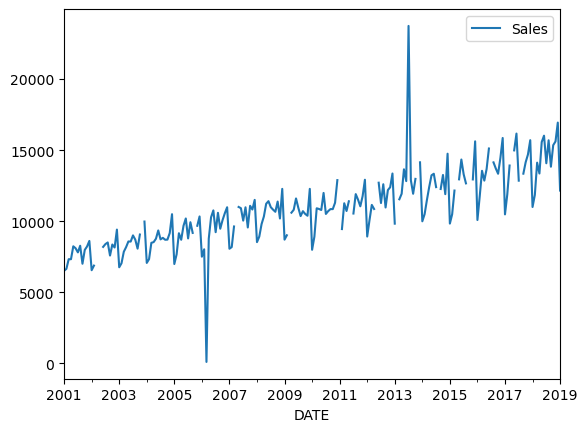

In [38]:
data.plot();

### Imputation

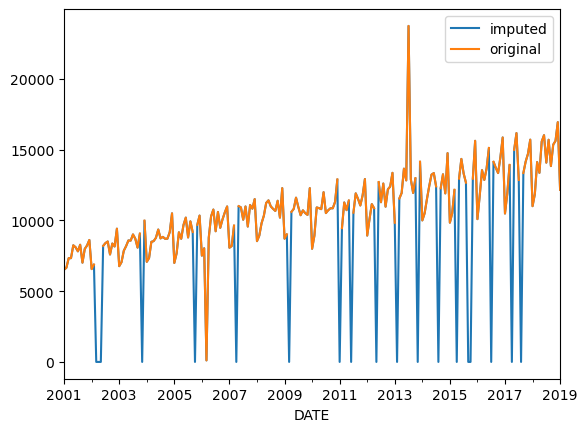

In [39]:

data['Sales'].fillna(0).plot(label='imputed')
data['Sales'].plot(label='original')
plt.legend();

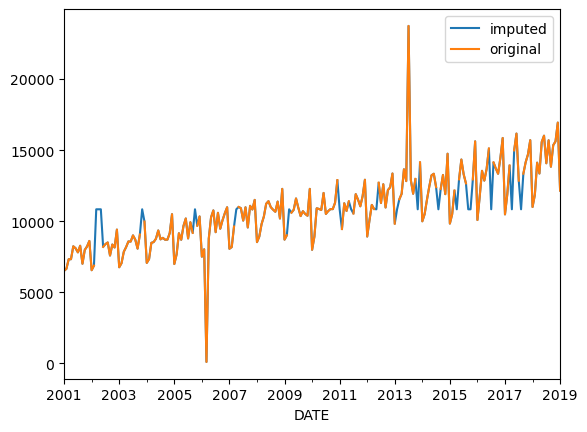

In [40]:
data['Sales'].fillna(data['Sales'].mean()).plot(label="imputed")
data['Sales'].plot(label="original")

plt.legend()
plt.show()

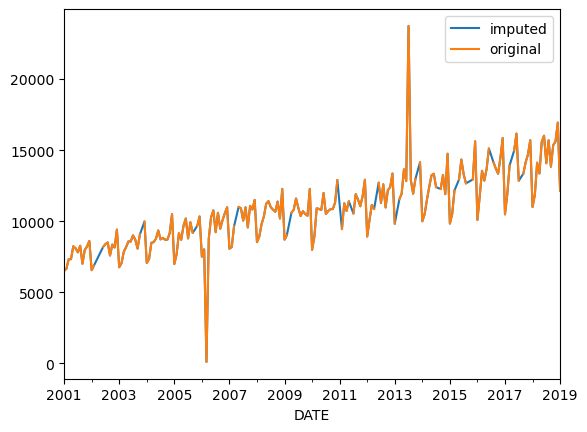

In [41]:
# linear interpolation

data.Sales.interpolate(method  = 'linear').plot(label='imputed')
data.Sales.plot(label='original')

plt.legend();

<Axes: xlabel='DATE'>

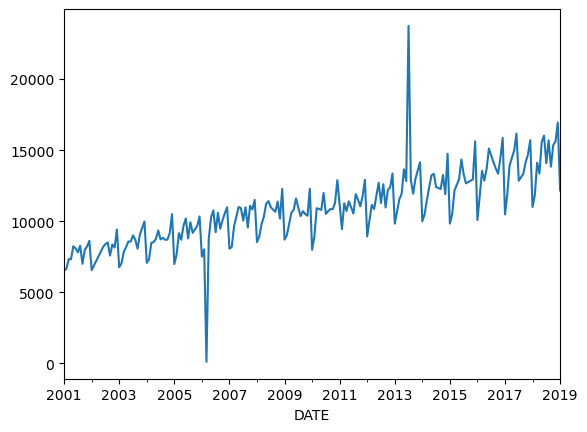

In [42]:
data.Sales = data.Sales.interpolate(method  = 'linear')
data.Sales.plot()

[]

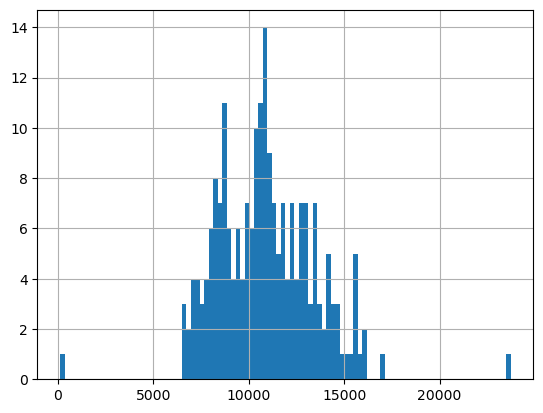

In [13]:
data.Sales.hist(bins=100).plot()

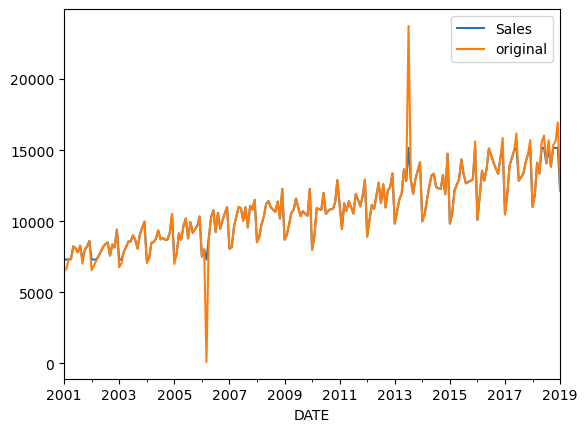

In [43]:
data.Sales.clip(upper=data.Sales.quantile(0.95),lower=data.Sales.quantile(0.05)).plot()
data['Sales'].plot(label="original")
plt.legend();

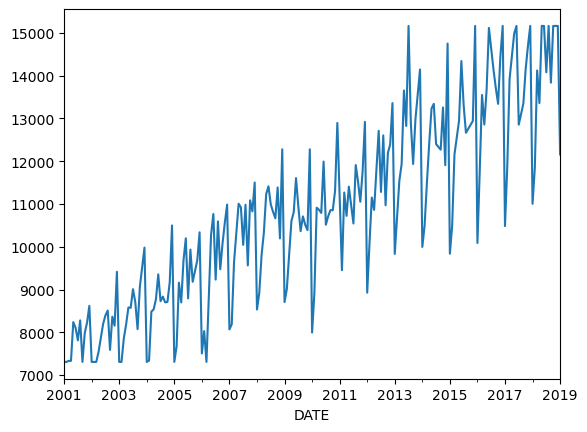

In [44]:
data.Sales.clip(upper=data.Sales.quantile(0.95),lower=data.Sales.quantile(0.05)).plot();

In [45]:
data.Sales=data.Sales.clip(upper=data.Sales.quantile(0.95),lower=data.Sales.quantile(0.05))

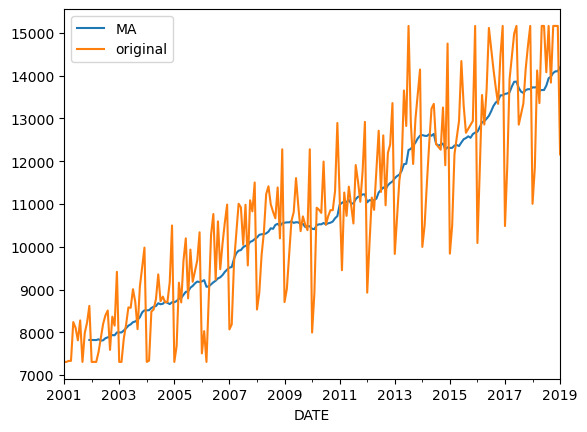

In [46]:
data.Sales.rolling(12).mean().plot(label='MA') ## Moving Average (MA) 12 months
data.Sales.plot(label='original')
plt.legend();

In [47]:
import statsmodels.api as sm
model=sm.tsa.seasonal_decompose(data.Sales)

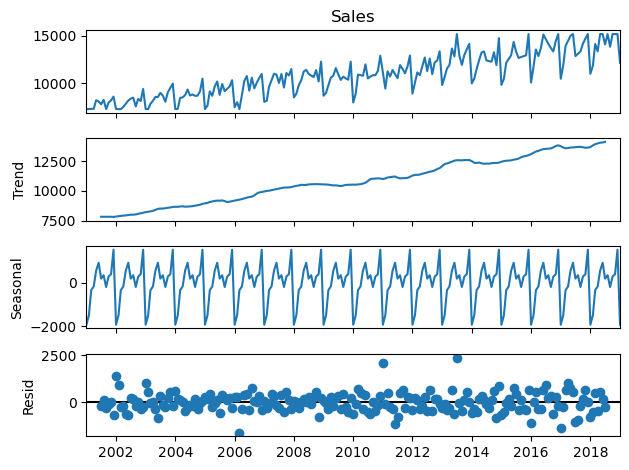

In [24]:
model.plot();

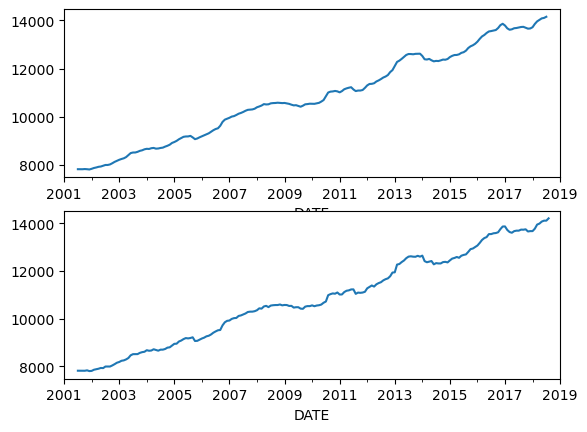

In [48]:
plt.subplot(2,1,1)
model.trend.plot()
plt.subplot(2,1,2)
data.Sales.rolling(12,center=True).mean().plot();

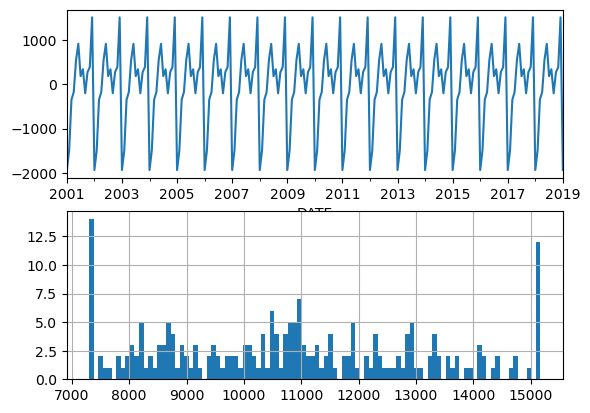

In [49]:
plt.subplot(2,1,1)
model.seasonal.plot()
plt.subplot(2,1,2)
data.Sales.hist(bins=100);

In [39]:
model.resid.mean()

np.float64(-2.547773692809866)

In [53]:
train_max_date = data.index[-12]



train_x = data.loc[data.index < data.index[-12]].copy()
test_x = data.loc[data.index >= data.index[-12]].copy()

In [41]:
train_x.shape, test_x.shape

((205, 1), (12, 1))

In [42]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15164.6
2018-06-01,15164.6
2018-07-01,14080.0
2018-08-01,15164.6
2018-09-01,13838.0
2018-10-01,15164.6


In [50]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [44]:
train_x['Sales'].mean()

np.float64(10659.16)

In [45]:
# Mean model
test_x['pred'] = train_x['Sales'].mean()
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,10659.16
2018-03-01,14123.0,10659.16
2018-04-01,13360.0,10659.16
2018-05-01,15164.6,10659.16
2018-06-01,15164.6,10659.16


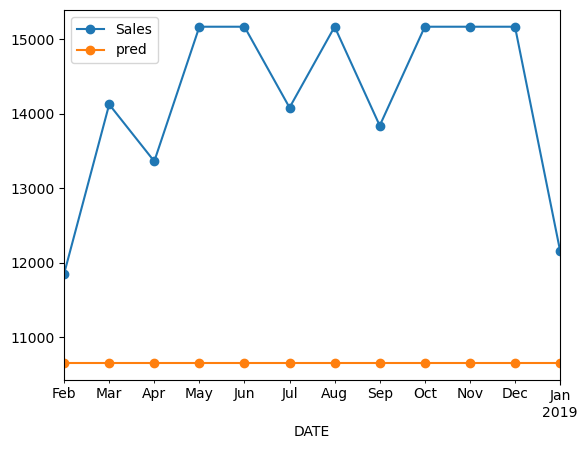

In [46]:
test_x.plot(style='-o');

In [47]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3540.89
RMSE : 3725.69
MAPE: 0.244


In [50]:
## Naive Model: Prediction is the last value of the train data

In [54]:
test_x['pred'] = train_x['Sales'][-1]

C:\Users\kanwar\AppData\Local\Temp\ipykernel_28896\4166961390.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


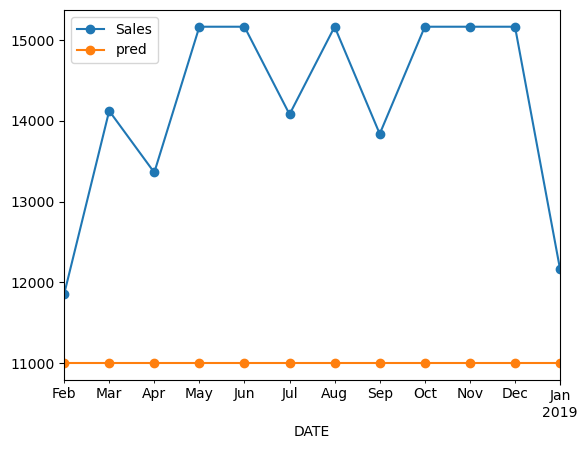

In [55]:
test_x.plot(style='-o');

In [51]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3195.05
RMSE : 3398.707
MAPE: 0.219


In [56]:
# Seasonal Naive
pred = []

for i in test_x.index:
  pred.append(train_x.loc[i - pd.DateOffset(years=1)]['Sales'])

test_x['pred'] = pred
test_x.head()

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15164.6,14986.0
2018-06-01,15164.6,15164.6


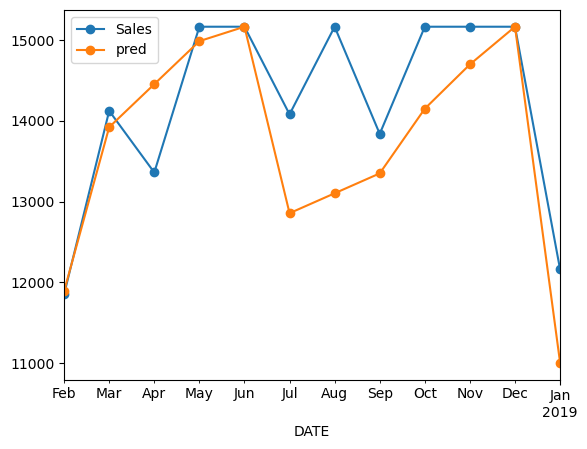

In [57]:
test_x.plot(style='-o');

In [54]:
performance(test_x['Sales'], test_x['pred'])

MAE : 660.367
RMSE : 905.569
MAPE: 0.047


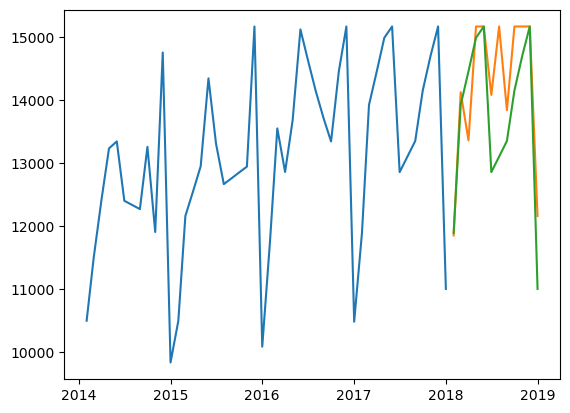

In [55]:
plt.plot(train_x['Sales'][-48:], label='train')
plt.plot(test_x)
plt.plot();

In [56]:
## Drift Method: Naive+Trend

# Get the slope
yt = train_x['Sales'][-1]

m = (yt - train_x['Sales'][0]) / len(train_x)

h = np.arange(0, 12)

test_x['pred'] = yt +  h*m

C:\Users\kanwar\AppData\Local\Temp\ipykernel_18508\1029698906.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yt = train_x['Sales'][-1]
C:\Users\kanwar\AppData\Local\Temp\ipykernel_18508\1029698906.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (yt - train_x['Sales'][0]) / len(train_x)


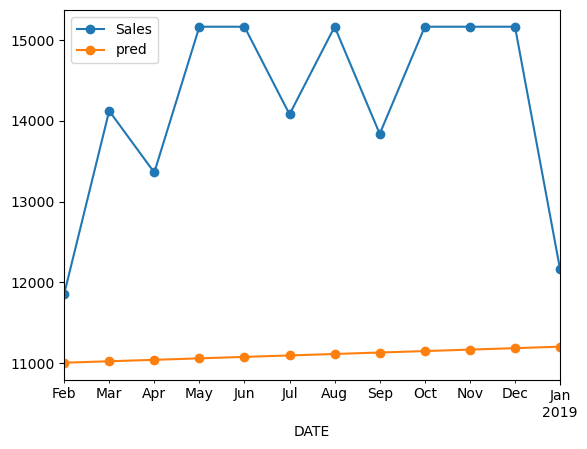

In [57]:
test_x.plot(style='-o');

In [58]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3095.857
RMSE : 3301.099
MAPE: 0.212


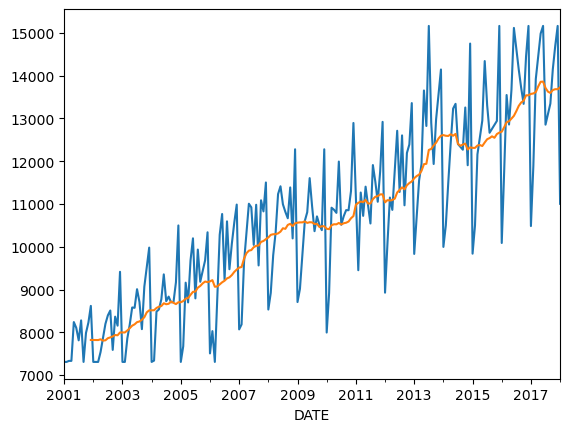

In [59]:
train_x.Sales.plot();
train_x.Sales.rolling(12).mean().plot();

In [60]:
pred_ = train_x.Sales.copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-6:].mean()) # MA(6) last 6 months avg.

test_x['pred'] = pred_[-12:] # predictions

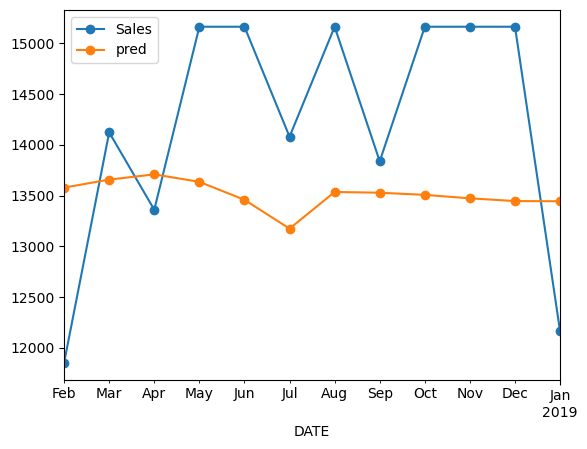

In [61]:
test_x.plot(style='-o');

In [62]:
performance(test_x.Sales, test_x.pred);

MAE : 1247.799
RMSE : 1364.818
MAPE: 0.088


### Exponential Smoothing Model:

1. Simple Exp Smoothing model
2. Double Exp Smoothing model
3. Tripple Exp Smoothing Model

In [ ]:
## SESM : Naive+Rolling mean with weightage which reduce exponentially

In [63]:
model = sm.tsa.SimpleExpSmoothing(data.Sales).fit(smoothing_level=0.2) # alpha
pred = model.forecast(12) # pred for next 12 months.

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


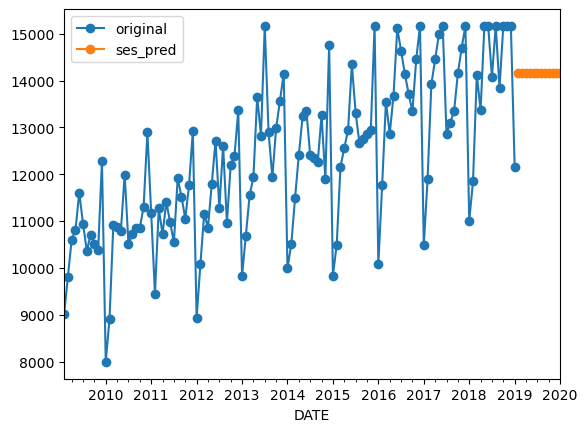

In [64]:
data.Sales[-120:].plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o')
plt.legend()

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


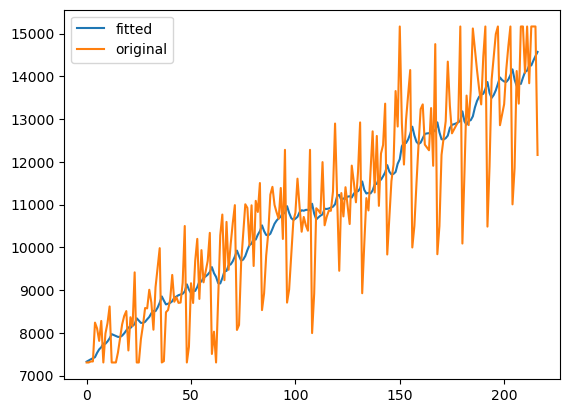

In [14]:
# just by adding trend -> DES
model = sm.tsa.ExponentialSmoothing(data.Sales, trend="add").fit(smoothing_trend=0.02);
model.fittedvalues.plot(label="fitted")
data.Sales.plot(label="original")

plt.legend();

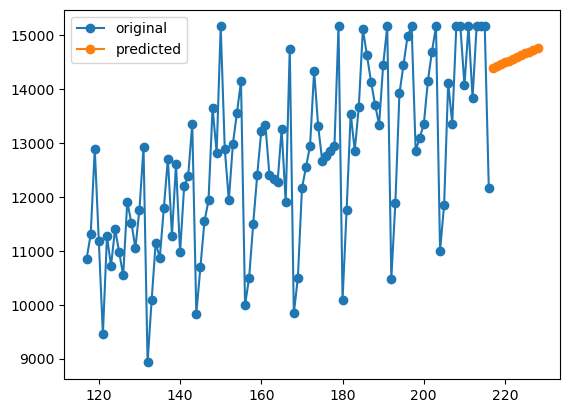

In [16]:
pred = model.forecast(12)
data.Sales.tail(100).plot(label="original", style='-o')
pred.plot(label="predicted", style='-o')
plt.legend()

MAE : 483.93
RMSE : 599.863
MAPE: 0.035


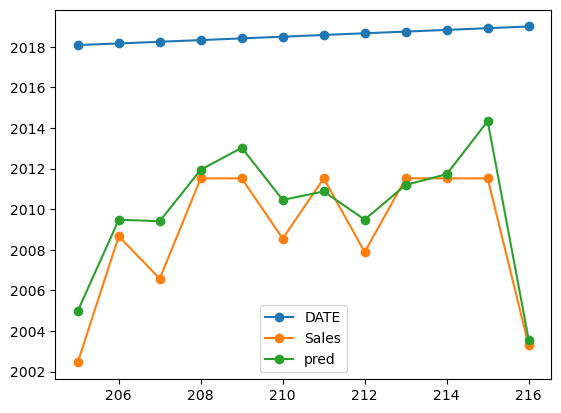

In [52]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [59]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend="add", seasonal = "add").fit();

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


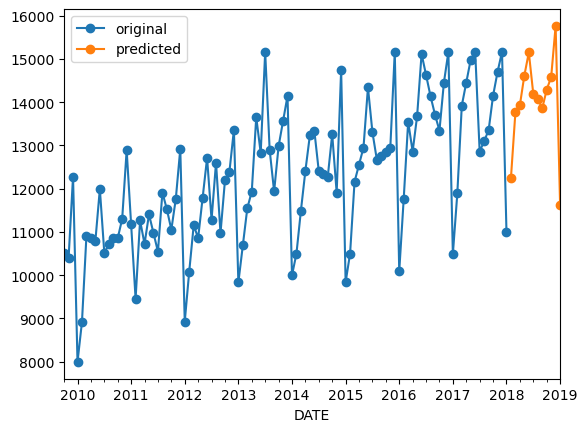

In [61]:
pred = model.forecast(12)
train_x.Sales.tail(100).plot(label="original", style='-o')
pred.plot(label="predicted", style='-o')
plt.legend()

In [62]:
test_x['pred']=pred.values

MAE : 473.509
RMSE : 565.711
MAPE: 0.033


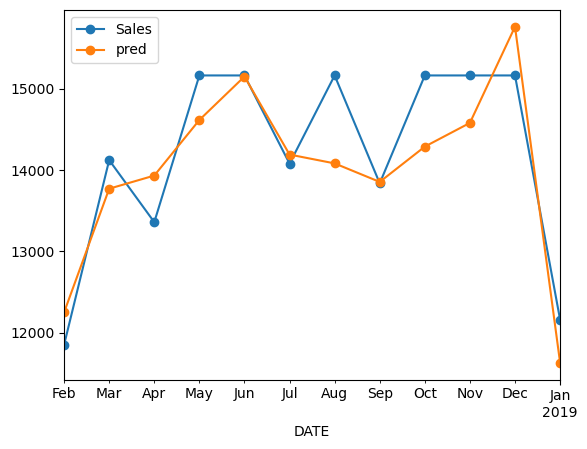

In [63]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [64]:
## check if the time series is stationary:

def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]

    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

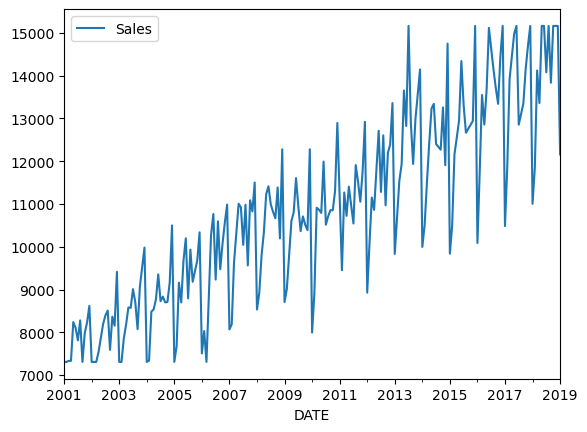

In [66]:
data.plot();

In [67]:
adf_test(data.Sales)

Sequence is not stationary


In [69]:
### Convert Non Stationary Time series to Stationary Time Series

model=sm.tsa.seasonal_decompose(data.Sales)

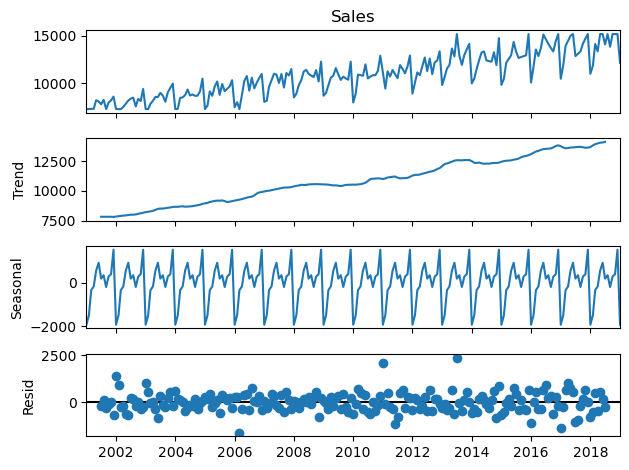

In [71]:
model.plot();

<Axes: xlabel='DATE'>

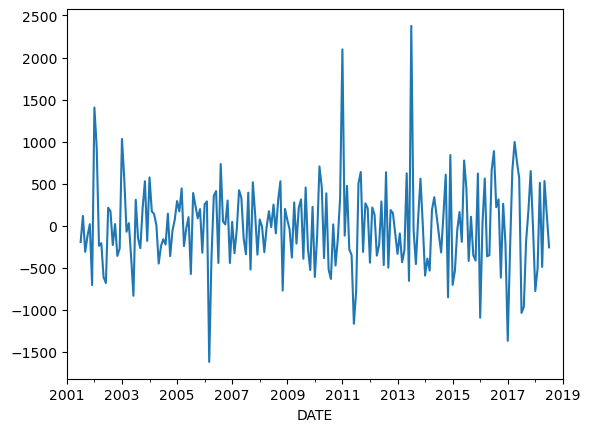

In [75]:
model.resid.plot()

## Conversion of Non Stationary to Stationary using Residual
Menthod1: Decomposition

y(t)=b(t)+s(t)+e(t)

Remove nulls from e(t) which has no trend and sesonality which makes it a stationary time series.

e(t)=y(t)-b(t)-s(t)

Method2: Differentiation

In [77]:
adf_test(model.resid.dropna())

Sequence is stationary


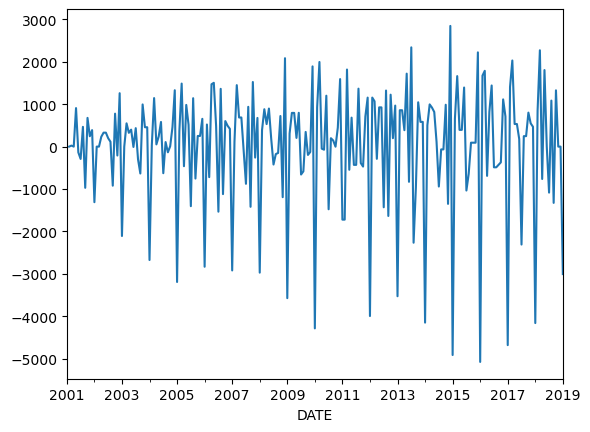

In [82]:
## Differentiation
data.Sales.diff(1).plot();

In [84]:
adf_test(data.Sales.diff(1).dropna())

Sequence is stationary


In [85]:
## If this is non stationary then we can do double differentiation i.e make it more smoother

### Auto correlation

In [89]:
data.Sales.shift(1).head()

DATE
2001-01-01       NaN
2001-02-01    7307.8
2001-03-01    7307.8
2001-04-01    7332.0
2001-05-01    7332.0
Name: Sales, dtype: float64

In [91]:
## check auto correlation with lag=12
lag=12
np.corrcoef(data.Sales[lag:],data.Sales.shift(lag)[lag:])[0][1]

np.float64(0.9419098493883264)

In [92]:
## check auto correlation with lag=12
lag=6
np.corrcoef(data.Sales[lag:],data.Sales.shift(lag)[lag:])[0][1]

np.float64(0.7966090507569205)

In [93]:
## There is high correlation with 12 lag i.e because there is seasonality of 12 months

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

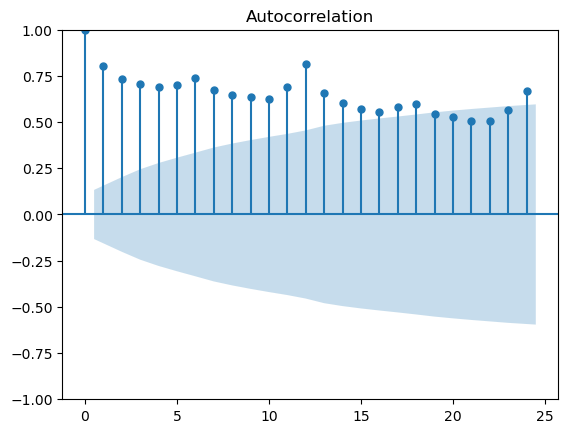

In [95]:
plot_acf(data.Sales);

<Axes: xlabel='DATE'>

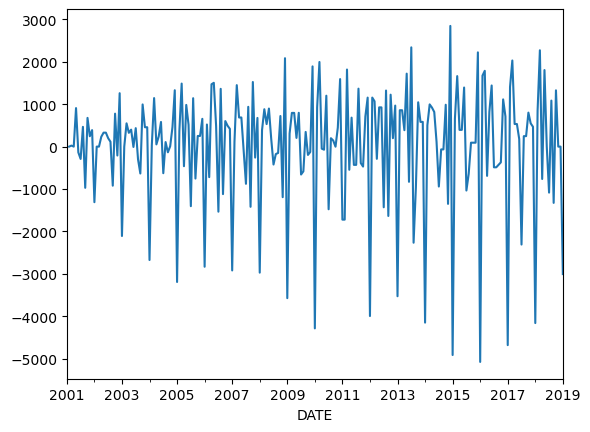

In [96]:
data.Sales.diff(1).plot()

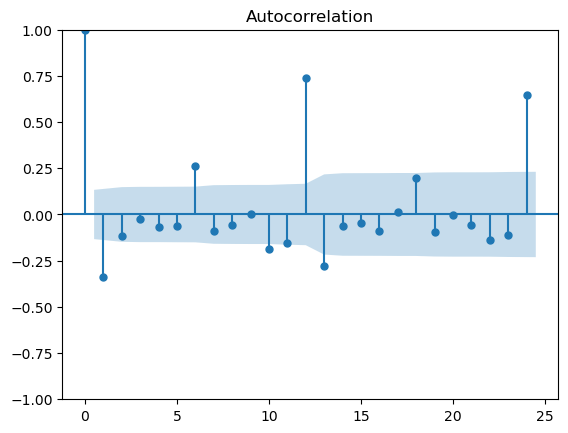

In [99]:
## Differentiation removes the trend from the data
plot_acf(data.Sales.diff().dropna());

### Highest correlation is visible with lag value=12
Note here the correlation is also negative because the differentation values are negative as well which is unlike the original data 

In [100]:
## Lecture:4

### ARIMA:

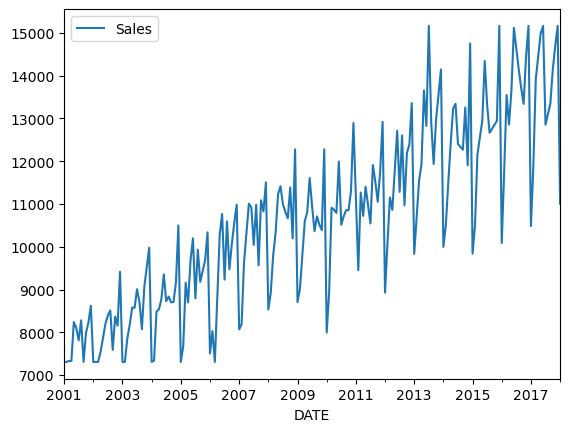

In [101]:
train_x.plot();

In [102]:
  train_x_st = train_x.copy()

  train_x_st.Sales = train_x_st.Sales.diff(1)
  train_x_st.dropna(inplace=True)

In [103]:
adf_test(train_x_st.Sales)

Sequence is stationary


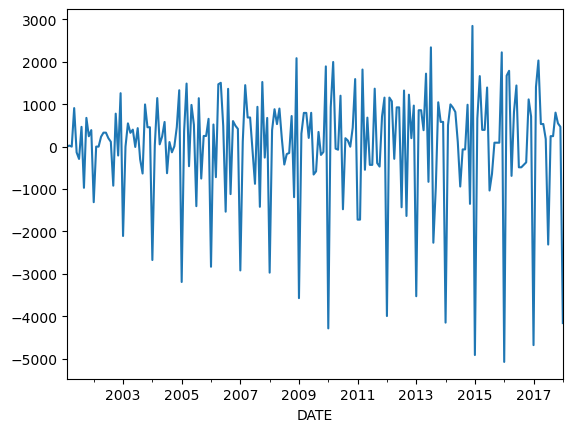

In [104]:
train_x_st.Sales.plot();

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # supermodel

In [106]:
# order = (p, d, q)
model = SARIMAX(train_x_st.Sales, order = (3,0,0) ) # AR(3)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)



C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
test_x.head(10)

,Sales,pred
DATE,,
2018-02-01,11852.0,1806.871390
2018-03-01,14123.0,512.621534
2018-04-01,13360.0,-6.529820
2018-05-01,15164.6,-582.530925
2018-06-01,15164.6,183.503533
2018-07-01,14080.0,122.694532
2018-08-01,15164.6,-1.070891
2018-09-01,13838.0,-84.884694
2018-10-01,15164.6,16.220618


### Why negative sales?? 
Because the model is trained with differences/differentiated data, hence post processing is required to check performance to compare the prediction and actual value

In [109]:
# order = (p, d, q)
model = SARIMAX(train_x_st.Sales, order = (3,0,0) ) # AR(3)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)

# post processing
test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\AppData\Local\Temp\ipykernel_28896\2208145763.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()


MAE : 1489.515
RMSE : 1677.498
MAPE: 0.102


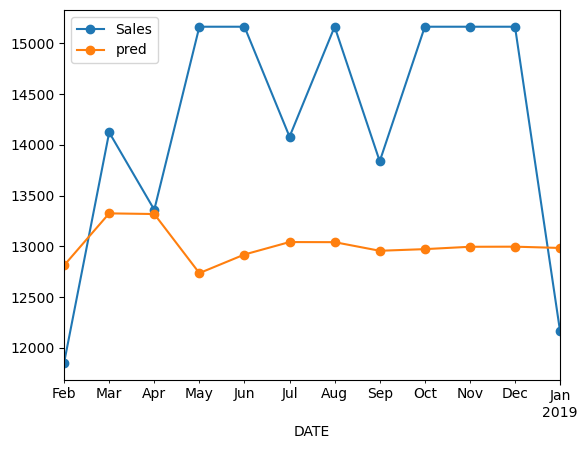

In [110]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\AppData\Local\Temp\ipykernel_28896\2927954615.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()


MAE : 747.487
RMSE : 897.502
MAPE: 0.053


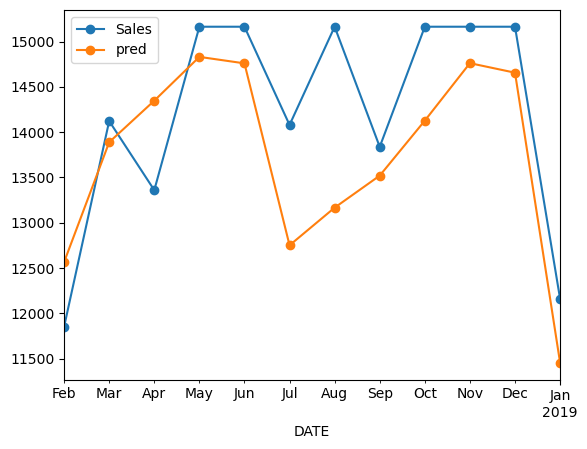

In [111]:
# order = (p, d, q)
model = SARIMAX(train_x_st.Sales, order = (12,0,0) ) # AR(12)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)

# post processing
test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()


test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kanwar\AppData\Local\Temp\ipykernel_28896\3566005573.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum

MAE : 1095.166
RMSE : 1369.994
MAPE: 0.075


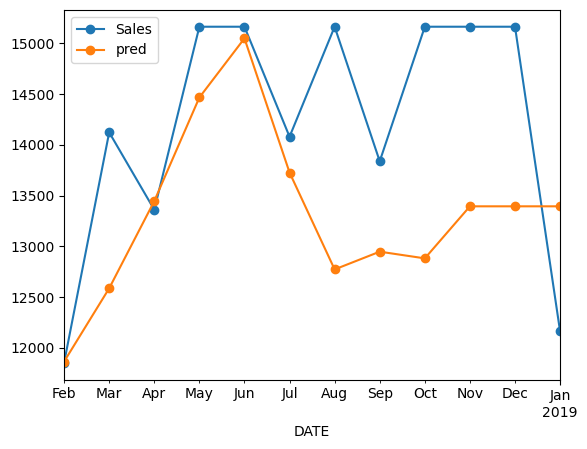

In [112]:
# order = (p, d, q)
model = SARIMAX(train_x_st.Sales, order = (0,0,10) ) # MA(10)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)

# post processing
test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()


test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maxi

MAE : 619.802
RMSE : 713.085
MAPE: 0.045


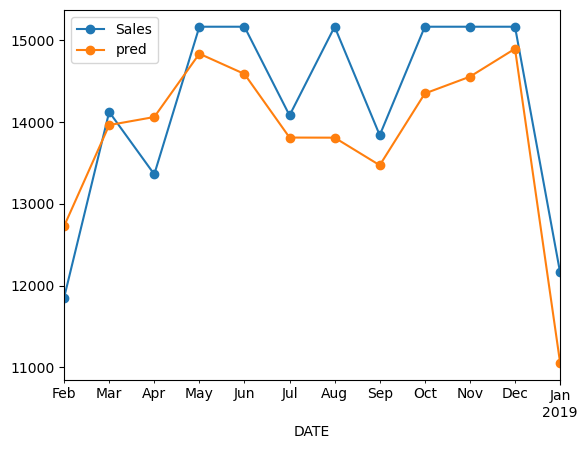

In [113]:
# order = (p, d, q)
model = SARIMAX(train_x_st.Sales, order = (12,0,12) ) # ARMA(12,12)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)

# post processing
test_x['pred'] = train_x.Sales[-1] + test_x['pred'].cumsum()


test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

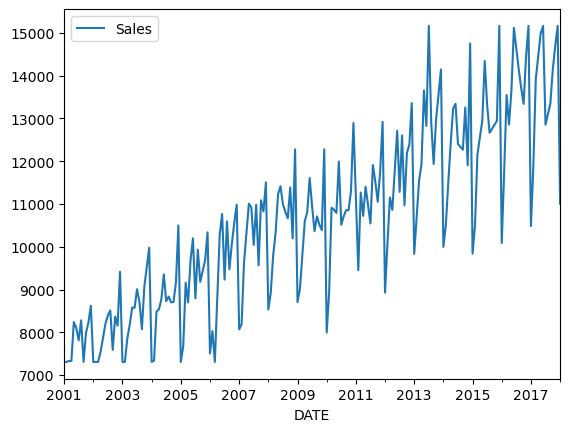

In [115]:
train_x.plot();

In [116]:
## ARIMA: I for integration hence it handles post processing and preprocessing, AR+I+MA

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1098.554
RMSE : 1198.155
MAPE: 0.077


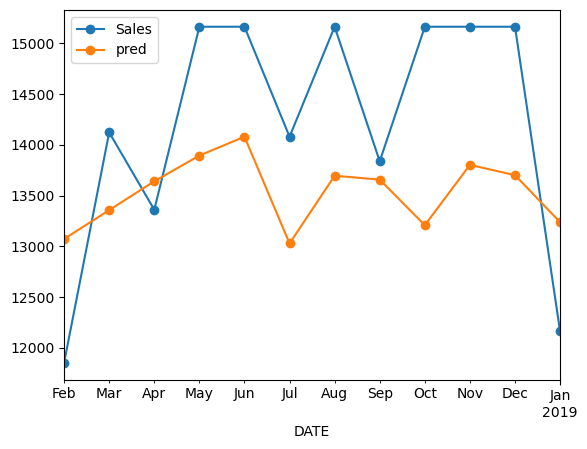

In [120]:
# order = (p, d, q)
model = SARIMAX(train_x.Sales, order = (5,1,3) ) # ARIMA(5, 1, 3) #5 previous values , 3 previous errors and 1 differentiation
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maxi

MAE : 475.359
RMSE : 617.215
MAPE: 0.034


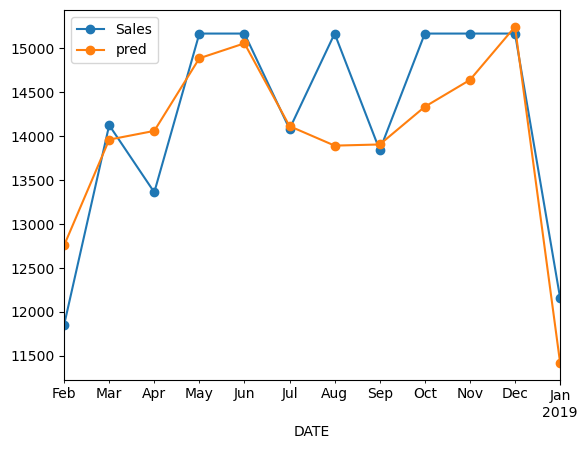

In [121]:
# (p, d, q)
model = SARIMAX(train_x.Sales, order = (15, 1, 12)) # ARIMA(5, 1, 5)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [122]:
## SARIMA: Seasonal ARIMA, seasonality+AR+I+MA

C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kanwar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 426.811
RMSE : 508.667
MAPE: 0.031


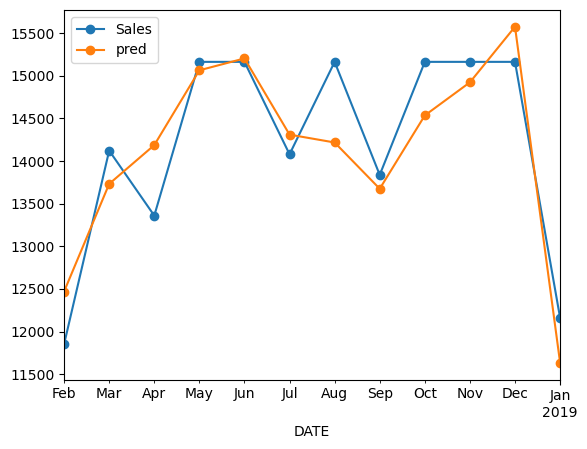

In [123]:
# order = (p, d, q), seaonal_order= P,D,Q,S----12 is seaonality, 12 months seasonality
model = SARIMAX(train_x.Sales, order = (5,1,3), seasonal_order=(1,1,1,12)) # SARIMA(5, 1, 3)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])